In [12]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

# Import Tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [2]:
# Import dataset
dataset = pd.read_csv('cancer.csv')
dataset.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [3]:
# Preprocessing 
dataset.drop('id',axis=1, inplace=True)

# Drop the unnamed column
dataset.drop(dataset.columns[31],axis=1,inplace=True)

# diagnosis labels M -> 1 and B -> 0
dataset.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)

In [4]:
# Split into features and targets

y = dataset.diagnosis
X = dataset.drop('diagnosis',axis=1)


In [8]:
# Create training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)

# convert to numpy array
X_train = X_train.values
X_test = X_test.values

# One-hot encoding of the targets
y_train = to_categorical(y_train)

# Normalize the features
# via robustscaler: This Scaler removes the median and scales the data according to the quantile range 

Rscaler = RobustScaler()
Rscaler.fit(X_train)

X_train = Rscaler.transform(X_train)
X_test = Rscaler. transform(X_test)


In [20]:
# Initialize the neural network

## parameters of the NN
model = Sequential()
dropoutrate = 0.2
batchsize = 16
inputdim = X_train.shape[1]  #30 input features
adam = tf.keras.optimizers.Adam()
sgd = tf.keras.optimizers.SGD()


model.add(Dense(10, input_dim=inputdim, kernel_initializer='uniform',activation='relu'))
#model.add(Dropout(dropoutrate))
#model.add(BatchNormalization())
model.add(Dense(40, kernel_initializer='uniform',activation='relu'))
#model.add(Dropout(dropoutrate))
#model.add(BatchNormalization())
model.add(Dense(40, kernel_initializer='uniform',activation='relu'))
model.add(Dropout(dropoutrate))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=adam,metrics=['accuracy'])

# Training

history = model.fit(X_train, y_train, epochs=80,validation_split=0.3, batch_size=batchsize,verbose=1)


# Testing

y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Epoch 1/80
19/19 [==============================] - 0s 7ms/step - loss: 0.5118 - accuracy: 0.8792 - val_loss: 0.6474 - val_accuracy: 0.6016
Epoch 2/80
19/19 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9530 - val_loss: 0.5716 - val_accuracy: 0.7500
Epoch 3/80
19/19 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9664 - val_loss: 0.5193 - val_accuracy: 0.8281
Epoch 4/80
19/19 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9664 - val_loss: 0.4757 - val_accuracy: 0.8672
Epoch 5/80
19/19 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9765 - val_loss: 0.4568 - val_accuracy: 0.8594
Epoch 6/80
19/19 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9732 - val_loss: 0.4260 - val_accuracy: 0.9141
Epoch 7/80
19/19 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9832 - val_loss: 0.3955 - val_accuracy: 0.9297
Epoch 8/80
19/19 [==

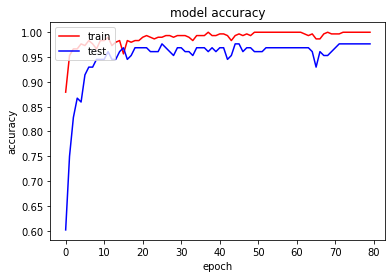

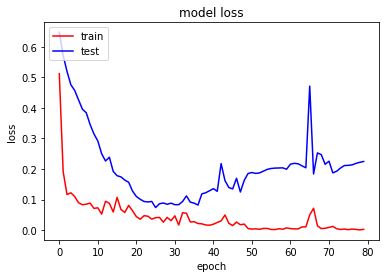

In [21]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()